<a href="https://colab.research.google.com/github/chjohnso-um/chjohnso-um-CSC-587/blob/main/PCA_top30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Perform PCA on the top 30 metabolites CSV generated by XGBoost

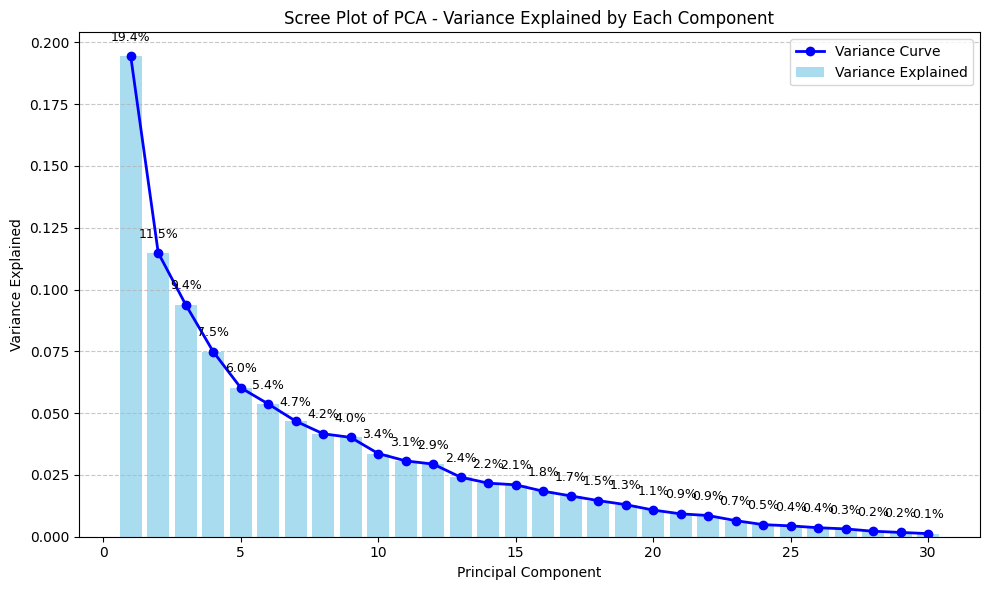

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ✅ Load your top 30 features (adjust path as needed)
X_selected = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/top30_xgboost_metabolites.csv')

# ✅ Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# ✅ Perform PCA
pca = PCA()
pca.fit(X_scaled)

# ✅ Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# ✅ Create Scree plot with bars and percentage labels
plt.figure(figsize=(10, 6))
bars = plt.bar(
    np.arange(1, len(explained_variance) + 1),
    explained_variance,
    alpha=0.7,
    color='skyblue',
    label='Variance Explained'
)

plt.plot(
    np.arange(1, len(explained_variance) + 1),
    explained_variance,
    'o-', color='blue', linewidth=2, label='Variance Curve'
)

# ✅ Add percentage labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{explained_variance[i] * 100:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot of PCA - Variance Explained by Each Component')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Plot PCA of Metabolic Data for PC1 and PC2

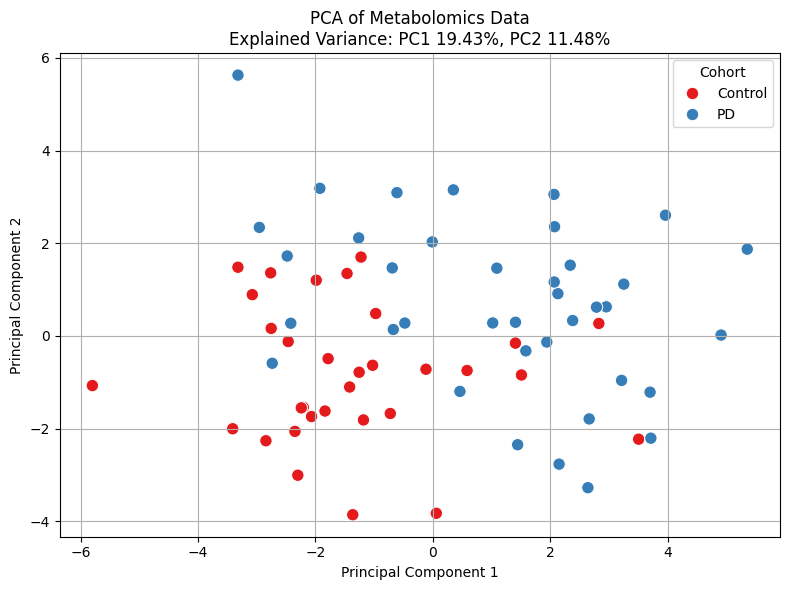

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ✅ Load top 30 metabolite features
X_selected = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/top30_xgboost_metabolites.csv')

# ✅ Load the original dataset to get cohort labels
bl_data = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/curated_log_data_bl.csv')
y_bl = bl_data['PPMI_COHORT'].map({'PD': 1, 'Control': 0})

# ✅ Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# ✅ Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# ✅ Create a DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cohort'] = y_bl.map({0: 'Control', 1: 'PD'})

# ✅ Scatter plot of PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cohort', palette='Set1', s=80)

plt.title(f'PCA of Metabolomics Data\nExplained Variance: PC1 {pca.explained_variance_ratio_[0]:.2%}, PC2 {pca.explained_variance_ratio_[1]:.2%}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cohort')
plt.grid(True)
plt.tight_layout()
plt.show()


Plot PCA of Metabolic Data with Cluster Ellipses

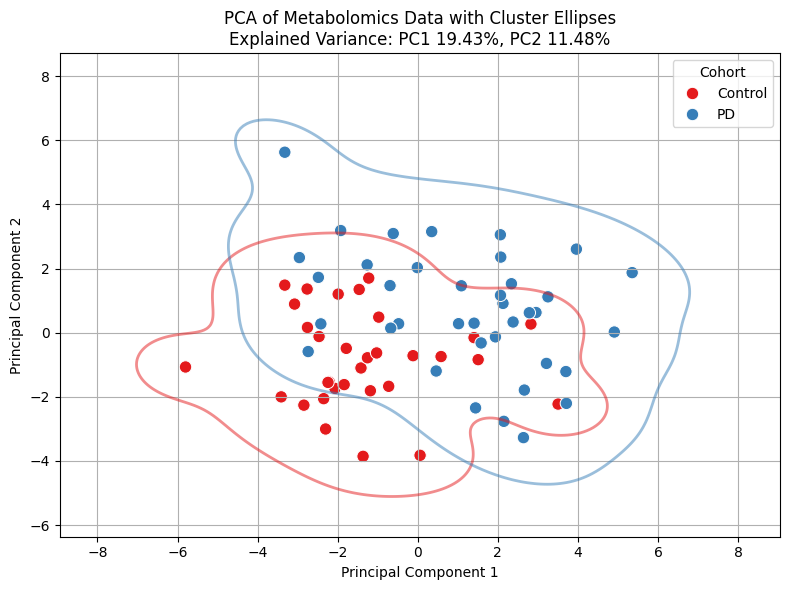

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ✅ Load top 30 metabolite features
X_selected = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/top30_xgboost_metabolites.csv')

# ✅ Load the original dataset to get cohort labels
bl_data = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/curated_log_data_bl.csv')
y_bl = bl_data['PPMI_COHORT'].map({'PD': 1, 'Control': 0})

# ✅ Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# ✅ Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# ✅ Create a DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cohort'] = y_bl.map({0: 'Control', 1: 'PD'})

# ✅ PCA Scatter Plot with Ellipses
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cohort', palette='Set1', s=80)

# ✅ Add confidence ellipse per cohort
sns.move_legend = getattr(sns, "move_legend", None)  # To avoid error if older seaborn

sns.kdeplot(
    data=pca_df, x='PC1', y='PC2', hue='Cohort',
    levels=1, fill=False, common_norm=False, palette='Set1', linewidths=2, alpha=0.5
)

plt.title(f'PCA of Metabolomics Data with Cluster Ellipses\nExplained Variance: PC1 {pca.explained_variance_ratio_[0]:.2%}, PC2 {pca.explained_variance_ratio_[1]:.2%}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cohort')
plt.grid(True)
plt.tight_layout()
plt.show()


Plot Linear SVM of PCA Transformed Data

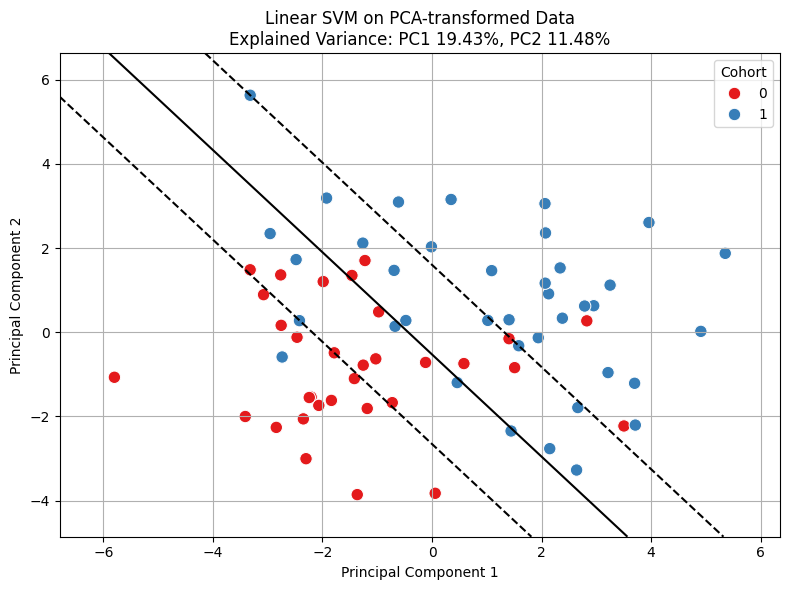

SVM Accuracy on PCA components: 0.8


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# ✅ Load the top 30 metabolite features
X_selected = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/top30_xgboost_metabolites.csv')

# ✅ Load labels
bl_data = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/curated_log_data_bl.csv')
y_bl = bl_data['PPMI_COHORT'].map({'PD': 1, 'Control': 0})

# ✅ Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# ✅ PCA transform
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cohort'] = y_bl.values

# ✅ Train Linear SVM on PCA components
svm_clf = SVC(kernel='linear', C=1.0, probability=True)
svm_clf.fit(pca_components, y_bl)

# ✅ Create mesh grid for decision boundary
xx, yy = np.meshgrid(
    np.linspace(pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1, 500),
    np.linspace(pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1, 500)
)
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# ✅ Plot PCA with SVM decision boundary and margins
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cohort', palette='Set1', s=80)

# Plot SVM decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='black')

plt.title(f'Linear SVM on PCA-transformed Data\nExplained Variance: PC1 {pca.explained_variance_ratio_[0]:.2%}, PC2 {pca.explained_variance_ratio_[1]:.2%}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cohort')
plt.grid(True)
plt.tight_layout()
plt.show()
print("SVM Accuracy on PCA components:", svm_clf.score(pca_components, y_bl))

AUC ROC of the PCA-SVM

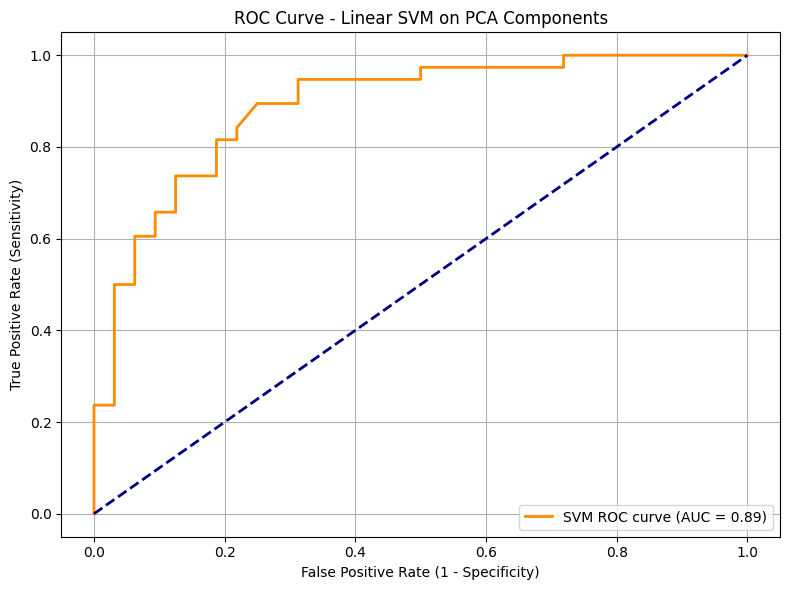

SVM AUC on PCA-transformed data: 0.89


In [14]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# ✅ Get probability estimates for PD (class 1)
y_scores = svm_clf.predict_proba(pca_components)[:, 1]

# ✅ Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_bl, y_scores)
roc_auc = auc(fpr, tpr)

# ✅ Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve - Linear SVM on PCA Components')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Optional: Print AUC
print(f"SVM AUC on PCA-transformed data: {roc_auc:.2f}")


Validation ROC Curve Linear SVM on V06

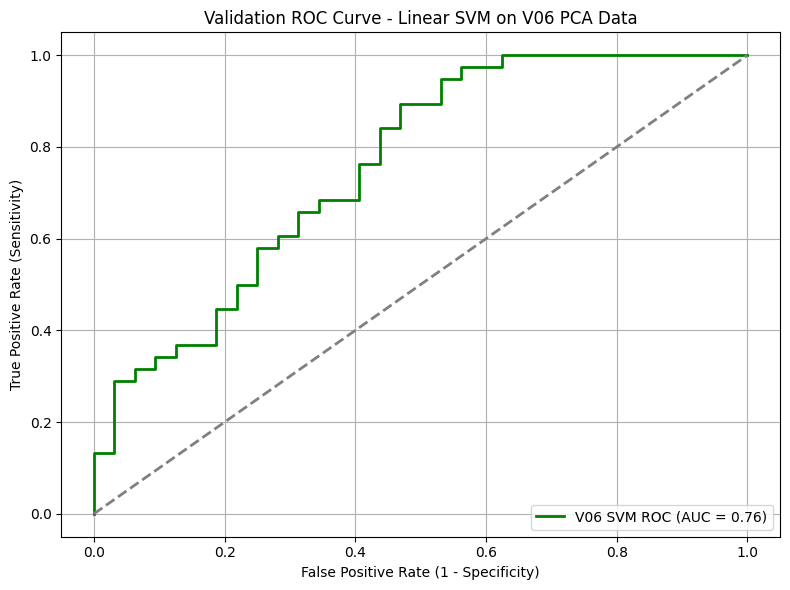

Validation AUC (V06) for SVM: 0.76


In [15]:
# ✅ Load V06 data
v06_data = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/curated_log_data_v06.csv')
y_v06 = v06_data['PPMI_COHORT'].map({'PD': 1, 'Control': 0})

# ✅ Ensure V06 uses the same 30 features and same column order
X_v06 = v06_data[X_selected.columns]

# ✅ Standardize V06 data using the same scaler from BL
X_v06_scaled = scaler.transform(X_v06)

# ✅ Project V06 into the BL PCA space (no refitting PCA!)
pca_v06 = pca.transform(X_v06_scaled)

# ✅ Predict probabilities on V06 using the trained SVM
y_v06_scores = svm_clf.predict_proba(pca_v06)[:, 1]

# ✅ Compute ROC and AUC for V06
from sklearn.metrics import roc_curve, auc

fpr_v06, tpr_v06, _ = roc_curve(y_v06, y_v06_scores)
roc_auc_v06 = auc(fpr_v06, tpr_v06)

# ✅ Plot ROC for V06
plt.figure(figsize=(8, 6))
plt.plot(fpr_v06, tpr_v06, color='green', lw=2, label=f'V06 SVM ROC (AUC = {roc_auc_v06:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Validation ROC Curve - Linear SVM on V06 PCA Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Optional: Print AUC score
print(f"Validation AUC (V06) for SVM: {roc_auc_v06:.2f}")


ROC Comparison SVM on PCA of BL and V06

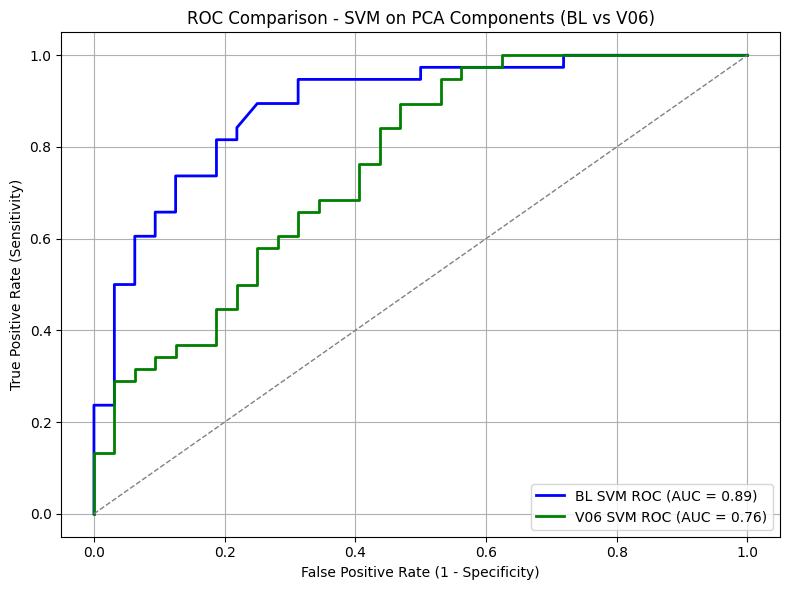

In [16]:
import matplotlib.pyplot as plt

# ✅ Assuming these are already computed:
# fpr, tpr, roc_auc --> for BL (training set)
# fpr_v06, tpr_v06, roc_auc_v06 --> for V06 (validation set)

plt.figure(figsize=(8, 6))

# Plot BL ROC
plt.plot(fpr, tpr, color='blue', lw=2, label=f'BL SVM ROC (AUC = {roc_auc:.2f})')

# Plot V06 ROC
plt.plot(fpr_v06, tpr_v06, color='green', lw=2, label=f'V06 SVM ROC (AUC = {roc_auc_v06:.2f})')

# Reference line for random guess
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Comparison - SVM on PCA Components (BL vs V06)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
